9630 Machine Learning - Laborotory 3

Task : NONLINEAR MODELS

Name : SALMAN MM

Reg No : 2021/E/102

Date : 21/02/2025

Time : 1.30-4.30PM

In [16]:
# 01. Download the ‘CDC Diabetes Health Indicators’ data from the UCI machine learning data repository

import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv"

In [17]:
# 02. Read the data as a CSV file.

data = pd.read_csv(url)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [18]:
# 03. Handle missing values and categorical variables appropriately

missing_values = data.isnull().sum()
print("Missing values before handling:", missing_values)

Missing values before handling: Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [19]:
# 4.	Encode categorical variables using suitable techniques such as one-hot encoding or label encoding.

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
encoded_data = pd.get_dummies(data, columns=categorical_cols)

In [20]:
# 5.	Divide the dataset into Input (X) and Target (y).

target_column = 'class_Positive'
X = encoded_data.drop(target_column, axis=1)
y = encoded_data[target_column]

In [21]:
# 6.	Create the training, validation and test datasets separately. (Use 70%, 20%, 10% respectively)

from sklearn.model_selection import train_test_split

# Split the data into training (70%) and remaining (30%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data into validation (20%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.333, random_state=42)

In [23]:
# 7.	Fit a nonlinear model using Radial Basis Functions (RBF) on the training data.
  # a.	Implement RBF kernel functions.
  # b.	Train the model using appropriate optimization techniques.
  # c.	Tune hyperparameters such as the number of basic functions and regularization strength.

from sklearn.svm import SVC

rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]})

In [24]:
# 8.	Apply a Perceptron on this training data.

from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_val_pred = perceptron.predict(X_val)

In [25]:
# 9.	Apply a Multi-Layer Perceptron (MLP) on the training data.
  # a.	Design the architecture of the MLP network.
  # b.	Implement forward propagation and backpropagation algorithms.
  # c.	Train the model using gradient descent or its variants.
  # d.	Experiment with different activation functions and network structures.
  # e.	Tune hyperparameters such as learning rate, batch size, and number of hidden layers/nodes.

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

grid = GridSearchCV(MLPClassifier(max_iter=100), param_grid, n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50,), (100,), (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

Model: SVC
Accuracy: 0.6923076923076923
Precision: 0.34615384615384615
Recall: 0.5
F1 Score: 0.4090909090909091
Model: Perceptron
Accuracy: 0.9807692307692307
Precision: 0.9705882352941176
Recall: 0.9861111111111112
F1 Score: 0.9778062313273581
Model: MLPClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


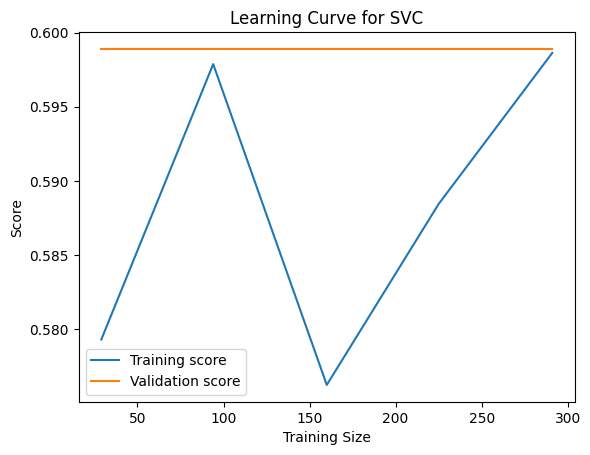

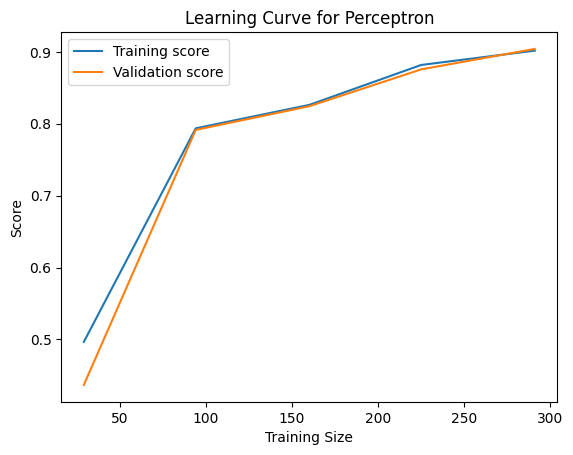

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

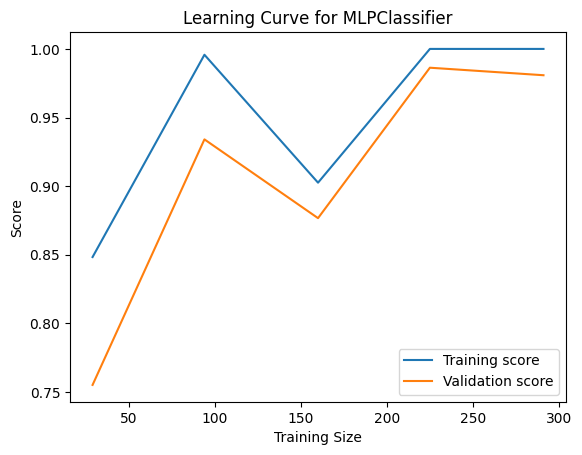

In [27]:
# 10.	Evaluate the performance of the nonlinear models on the test data.
  # a.	Compute accuracy, precision, recall, and F1-score.
  # b.	Plot learning curves to analyze model convergence and overfitting.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [rbf_model, perceptron, mlp]
for model in models:
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='Training score')
    plt.plot(train_sizes, val_scores_mean, label='Validation score')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.title(f'Learning Curve for {model.__class__.__name__}')
    plt.legend()
    plt.show()

for model in models:
    plot_learning_curve(model, X_train, y_train)